In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

plt.style.use('ggplot')

# Asiakasdatan generointi

In [5]:
rand_xs = []
rand_s = []
rand_m = []
rand_l = []
rand_xl = []
rand_xxl = []

for i in range(1,250):
    random_xs = (np.random.randint(1,4), np.around(np.random.uniform(1.50,1.62),2),np.random.randint(42,58),1)
    random_s = (np.random.randint(1,4), np.around(np.random.uniform(1.60,1.68),2),np.random.randint(52,62),2)
    random_m = (np.random.randint(1,4), np.around(np.random.uniform(1.65,1.78),2),np.random.randint(56,84),3)
    random_l = (np.random.randint(1,4), np.around(np.random.uniform(1.74,1.85),2),np.random.randint(75,88),4)
    random_xl = (np.random.randint(1,4), np.around(np.random.uniform(1.88,1.92),2),np.random.randint(85,95),5)
    random_xxl = (np.random.randint(1,4), np.around(np.random.uniform(1.90,2.05),2),np.random.randint(93,110),6)
    rand_xs.append(random_xs)
    rand_s.append(random_s)
    rand_m.append(random_m)
    rand_l.append(random_l)
    rand_xl.append(random_xl)
    rand_xxl.append(random_xxl)

In [6]:
data1 = rand_xs+rand_s+rand_m+rand_l+rand_xl+rand_xxl

In [7]:
df1 = pd.DataFrame(data1, columns=['tuote','pituus','paino','koko'])

In [8]:
df1.head()

,tuote,pituus,paino,koko
0,1,1.52,57,1
1,3,1.57,52,1
2,2,1.60,43,1
3,3,1.61,55,1
4,3,1.54,49,1


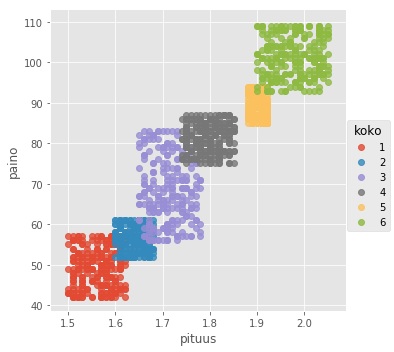

In [9]:
sns.lmplot(x='pituus', y='paino', data=df1, fit_reg=False, hue='koko')

# Train-Test-Split

In [10]:
X= df1[['tuote','pituus','paino']]
y= df1.koko
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# K-Nearest neighbors Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
predictions = knn.predict(X_test)

In [14]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.96      0.90      0.93        73
          2       0.88      0.82      0.85        91
          3       0.81      0.83      0.82        81
          4       0.87      0.96      0.92        79
          5       0.97      1.00      0.98        93
          6       1.00      0.96      0.98        77

avg / total       0.91      0.91      0.91       494



### Haetaan paras K-arvo

In [15]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

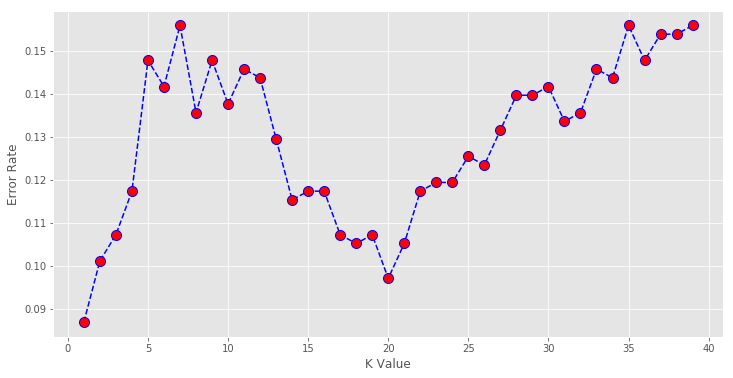

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

Paras K-arvo näyttäisi tulevan arvolla k = 1 (eli virhe on pienimmillään tässä kohtaa )

# Support Vector Classifier

In [17]:
from sklearn.svm import SVC

In [18]:
svc = SVC()

In [19]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
svc_preds = svc.predict(X_test)

In [21]:
print(classification_report(y_test, svc_preds))

             precision    recall  f1-score   support

          1       1.00      0.68      0.81        73
          2       0.71      0.96      0.82        91
          3       0.92      0.57      0.70        81
          4       0.74      0.82      0.78        79
          5       0.82      1.00      0.90        93
          6       1.00      0.92      0.96        77

avg / total       0.86      0.83      0.83       494



# Desicion Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier()

In [24]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
tree_preds = tree.predict(X_test)

In [26]:
print(classification_report(y_test, tree_preds))

             precision    recall  f1-score   support

          1       0.97      0.92      0.94        73
          2       0.93      0.88      0.90        91
          3       0.85      0.96      0.90        81
          4       0.96      0.94      0.95        79
          5       0.97      1.00      0.98        93
          6       1.00      0.96      0.98        77

avg / total       0.95      0.94      0.94       494



# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
forest = RandomForestClassifier()

In [29]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
forest_pred = forest.predict(X_test)

In [31]:
print(classification_report(y_test, forest_pred))

             precision    recall  f1-score   support

          1       1.00      0.90      0.95        73
          2       0.92      0.91      0.92        91
          3       0.88      0.95      0.91        81
          4       0.95      0.96      0.96        79
          5       0.97      1.00      0.98        93
          6       1.00      0.96      0.98        77

avg / total       0.95      0.95      0.95       494

